In [1]:
from tqdm.notebook import tqdm, trange
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from nustattools.stats import derate_covariance
from scipy.stats import chi2, norm
from scipy.special import erf
from scipy.optimize import least_squares

In [2]:
blocks_list = []
for k in [10, 30, 50, 100, 400]:
    l = k // 10
    blocks_list.extend(
        [
            [k - 1, 1],
            [k - 4, 1, 1, 1, 1],
            [l * 5, l * 2, l, l, l],
            [l * 4, l * 2, l * 2, l, l],
            [l * 3, l * 3, l * 2, l, l],
            [l] * 10,
            [l * 2] * 5,
            [l * 3] * 3 + [l],
            [l * 4] * 2 + [l * 2],
            [l * 6, l * 2, l * 2],
            [l * 5, l * 4, l * 1],
        ]
    )
# blocks_list

In [3]:
k_list = [np.sum(blocks) for blocks in blocks_list]

In [4]:
avg_block_list = []
for blocks in blocks_list:
    avg = 0
    for i, n in enumerate(blocks):
        avg += (i + 1) * n
    avg /= np.sum(blocks)
    avg_block_list.append(avg)

In [5]:
derate_list = []
for blocks in tqdm(blocks_list):
    k = np.sum(blocks)
    cov = np.full((k, k), np.nan)
    for i, ni in enumerate(blocks):
        bi = int(np.sum(blocks[:i]))
        cov[bi : bi + ni, bi : bi + ni] = np.eye(ni)
    derate_list.append(derate_covariance(cov))

  0%|          | 0/55 [00:00<?, ?it/s]

In [6]:
derate_list

[1.1077448343569052,
 1.8831548129554507,
 1.6997170197509721,
 1.9448013428992525,
 1.9596820382270113,
 3.3455856852035413,
 2.198636774823175,
 1.7868200962162737,
 1.5596629854902917,
 1.5000495481683036,
 1.45051443106673,
 1.0248663578178807,
 1.1536430653637433,
 1.5378177643189135,
 1.5933216917420758,
 1.6085476827706964,
 2.5260130488302446,
 1.7898986579721976,
 1.5221268354775421,
 1.372198653958268,
 1.3223773338749913,
 1.298097461491397,
 1.0118014187645912,
 1.0785772087265582,
 1.435872438780893,
 1.4829838673487123,
 1.5008212330281225,
 2.211558043592843,
 1.633956628711615,
 1.420628714608612,
 1.3004217994016034,
 1.2563589029037767,
 1.2399097099075531,
 1.0041712141157162,
 1.0635583215676676,
 1.3065177851681593,
 1.3478600583713842,
 1.3599350630818134,
 1.8701362286332837,
 1.4626841178693202,
 1.3085848999149439,
 1.221041805491233,
 1.1851994517532367,
 1.1759023710572154,
 1.0005088191914888,
 1.0070782964023721,
 1.158771359371762,
 1.1772568123716458,
 1.

In [7]:
from nustattools.stats.gx2.functions import gx2inv, gx2cdf_ruben, gx2stat
gx2inv(0.003, [1.,2,3,4,5], [15,4,1,1,4], [0.,0,0,0,0], 0., 0., side="upper")

array([116.97695024])

In [8]:
gx2cdf_ruben(10000, [1.,2,3,4,5], [15,4,1,1,4], [0,0,0,0,0], 0, side="upper")

(array([4.4408921e-16]), 3.3306690738754696e-16)

In [9]:
gx2stat(np.array([1,2,3,4.,5]), np.array([15,4,1,1,4]), np.array([0,0,0,0,0]), 0, 0)

(50.0, 312.0)

In [10]:
gx2inv(0.003, [1.,1.9999,2.9999,4.9999], [9,2,4,5], [0,0,0,0], 0., 0., side="upper")

array([120.80356094])

In [11]:
gx2cdf_ruben(100, [1.,2,3,5], [9,2,4,5], [0,0,0,0], 0, side="upper")

(array([0.01604007]), -0.0)

In [12]:
gx2stat(np.array([1.,2,3,5]), np.array([9,2,4,5]), np.array([0,0,0,0]), 0., 0.)

(50.0, 356.0)

In [13]:
limit_list = []
sigma = 3
gamma = chi2(df=1).cdf(sigma**2)
for k, i in zip(k_list, avg_block_list):
    limit_list.append(
        (np.sqrt(2 * k * (2 * i - 1) * (4 / (9 * (1 - gamma)))) + k)
        / chi2(df=k).ppf(gamma)
    )

In [14]:
var_list = []
for k, i in zip(k_list, avg_block_list):
    var_list.append(2 * k * (2 * i - 1))

In [15]:
blocks_list_b = []
for k in [4, 20, 40, 60, 100, 160, 220, 280, 320, 380]:
    blocks_list_b.extend(
        [
            [1]*k,
            [2]*(k//2),
            [4]*(k//4),
        ]
    )
# blocks_list

In [16]:
k_list_b = [np.sum(blocks) for blocks in blocks_list_b]

In [17]:
avg_block_list_b = []
for blocks in blocks_list_b:
    avg = 0
    for i, n in enumerate(blocks):
        avg += (i + 1) * n
    avg /= np.sum(blocks)
    avg_block_list_b.append(avg)

In [18]:
block_size_list = [k // len(blocks) for k, blocks in zip(k_list, blocks_list)]
block_size_list_b = [k // len(blocks) for k, blocks in zip(k_list_b, blocks_list_b)]

In [19]:
derate_list_b = []
for blocks in tqdm(blocks_list_b):
    k = np.sum(blocks)
    cov = np.full((k, k), np.nan)
    for i, ni in enumerate(blocks):
        bi = int(np.sum(blocks[:i]))
        cov[bi : bi + ni, bi : bi + ni] = np.eye(ni)
    derate_list_b.append(derate_covariance(cov))

  0%|          | 0/30 [00:00<?, ?it/s]

In [20]:
limit_list_b = []
sigma = 3
gamma = chi2(df=1).cdf(sigma**2)
for k, i in zip(k_list_b, avg_block_list_b):
    limit_list_b.append(
        (np.sqrt(2 * k * (2 * i - 1) * (4 / (9 * (1 - gamma)))) + k)
        / chi2(df=k).ppf(gamma)
    )

In [21]:
var_list_b = []
for k, i in zip(k_list_b, avg_block_list_b):
    var_list_b.append(2 * k * (2 * i - 1))

In [22]:
import pysr as sr

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [23]:
model = sr.PySRRegressor(
    unary_operators=["sqrt"],
    niterations=50,
    complexity_of_constants=2,
    warm_start=True,
    temp_equation_file=True,
    verbosity=0,
)

In [24]:
#X = pd.DataFrame({"k": k_list + k_list_b, "i": avg_block_list + avg_block_list_b})
X = pd.DataFrame({"k": k_list + k_list_b,
                  "i": avg_block_list + avg_block_list_b,
                  "V": var_list + var_list_b})
y = np.array(derate_list + derate_list_b)

In [73]:
#for _ in trange(4*10):
#    model.fit(X, y)

In [35]:
#model

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                                  i   
	1         6.287720                                            sqrt(i)   
	2         0.410464                                      sqrt(sqrt(i))   
	3         0.293774                                sqrt(sqrt(sqrt(V)))   
	4         0.685677                                sqrt(0.4429338 * i)   
	5         0.506400                            sqrt(sqrt(i * sqrt(i)))   
	6         0.183279                            sqrt(sqrt(V / (k - i)))   
	7         1.192923                     sqrt(i / sqrt(k)) / 0.40737718   
	8         0.268726               10.874222 * sqrt(i / (k + 64.74858))   
	9         0.095114  ((i / 0.07153062) / (k - -28.542833)) - -1.082...   
	10        0.966121  sqrt(sqrt(i)) + ((i * 7.811608) / (k - -15.285...   
	11        0.311767  sqrt(sqrt(i)) + (((V + V) / (k - -12.640825)) ...   
	12        0.116748  sqrt(sqrt(i)) + ((V / ((k - -11.046179) * k)) ...   
	13        0.104130  (((i / 0.13130127) + -5.7530684) / (k - -8.885...   
	14  >>>>  0.130052  (((V + V) / k) / (k - -10.598097)) + sqrt(sqrt...   
	15        0.020985  0.9437929 * (sqrt(sqrt(i)) + ((V / ((k - -11.0...   
	16        0.001903  ((((V + V) - i) / k) / (k - -10.276892)) + (sq...   
	17        0.127581  ((((i / 0.23877946) / (k - -17.85466)) + sqrt(...   
	
	           loss  complexity  
	0   1438.169300           1  
	1      2.673547           2  
	2      1.773477           3  
	3      1.322029           4  
	4      0.665971           5  
	5      0.401355           6  
	6      0.334142           7  
	7      0.101357           8  
	8      0.059216          10  
	9      0.048958          12  
	10     0.018631          13  
	11     0.013641          14  
	12     0.012138          15  
	13     0.010938          16  
	14     0.009604          17  
	15     0.009404          18  
	16     0.009386          19  
	17     0.008262          20  
]

In [74]:
from IPython.display import Math, display

#display(Math(model.latex()))


In [67]:
def approx_fun(k, i, V, x=(120,25,1)):
    #return 1 + (5/2)*((5/3)*np.sqrt(i) + (1/3)*i - 2.0) / np.sqrt(k + i)
    return np.sqrt( 1 + x[0]*(i - np.sqrt(i)) / (1*k + x[1]) )
    #return 1 + 1.5 * (i + np.sqrt(i) - 2) / (0.1*k + 1)
    #return 2*V/(k*(k+10.5)) + i**(0.25)
    #return model.predict([[k,i,V]])[0]

approx_list = []
approx_list_b = []
for k, i, V in zip(k_list, avg_block_list, var_list):
    approx_list.append(approx_fun(k,i,V))
for k, i, V in zip(k_list_b, avg_block_list_b, var_list_b):
    approx_list_b.append(approx_fun(k,i,V))

In [68]:
def opt_fun(x):
    return approx_fun(X["k"], X["i"], x) - y

#opt = least_squares(opt_fun, [130,40,1])
#opt

In [69]:
data = pd.DataFrame(
    {
        "k": k_list,
        "$N_i$": block_size_list,
        "alpha": derate_list,
        "approx": approx_list,
        "limit": limit_list,
        "ibar": avg_block_list,
    }
)

In [70]:
data_b = pd.DataFrame(
    {
        "k": k_list_b,
        "$N_i$": block_size_list_b,
        "alpha": derate_list_b,
        "approx": approx_list_b,
        "limit": limit_list_b,
        "ibar": avg_block_list_b,
    }
)

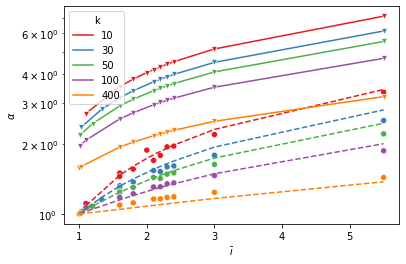

In [71]:
pal = "Set1"
sns.scatterplot(data, x="ibar", y="alpha", hue="k", palette=pal, legend=False)
sns.lineplot(
    data,
    x="ibar",
    y="approx",
    hue="k",
    marker=None,
    palette=pal,
    linestyle="dashed",
    legend=False,
)
sns.lineplot(data, x="ibar", y="limit", hue="k", marker="v", palette=pal)
plt.xlabel(r"$\bar{\imath}$")
plt.ylabel(r"$\alpha$")
plt.yscale("log")
plt.savefig("plots/derate-approx.pdf")

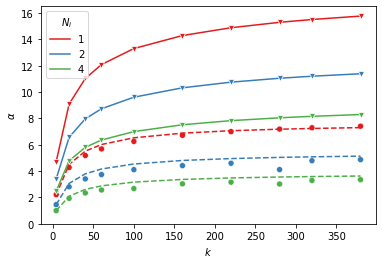

In [72]:
pal = "Set1"
sns.scatterplot(data_b, x="k", y="alpha", hue="$N_i$", palette=pal, legend=False)
sns.lineplot(
    data_b,
    x="k",
    y="approx",
    marker=None,
    hue="$N_i$",
    palette=pal,
    linestyle="dashed",
    legend=False,
)
sns.lineplot(data_b, x="k", y="limit", marker="v", hue="$N_i$", palette=pal)
plt.xlabel(r"$k$")
plt.ylabel(r"$\alpha$")
#plt.yscale("log")
plt.ylim(bottom=0)
plt.savefig("plots/derate-approx-b.pdf")